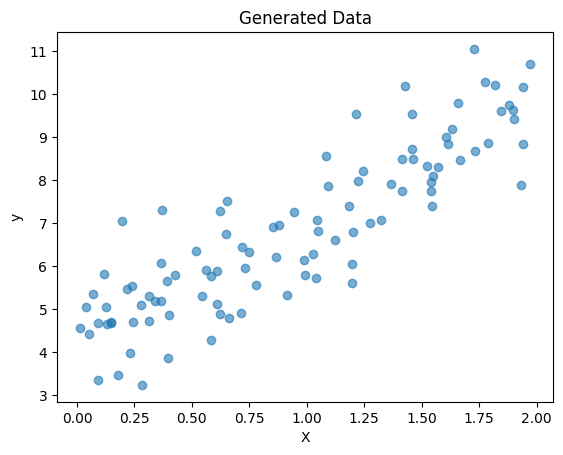

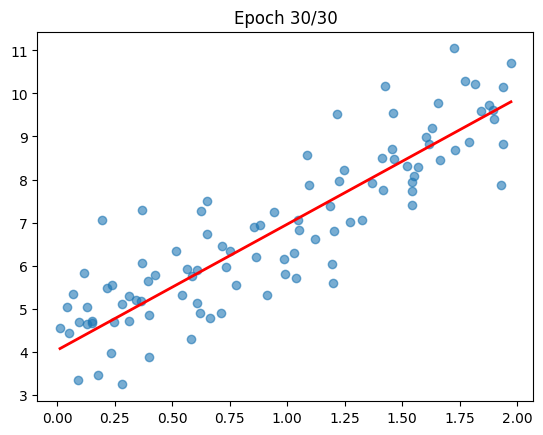

In [1]:
# Cell 1: Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.linear_model import SGDRegressor

# Cell 2: Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y, alpha=0.6)
plt.title("Generated Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Cell 3: SGD setup
sgd = SGDRegressor(
    loss="squared_error",
    penalty=None,
    alpha=0.0,
    learning_rate="invscaling",
    eta0=0.1,
    power_t=0.5,
    max_iter=1,
    tol=None,
    random_state=42,
    warm_start=True
)

epochs = 30
coef_hist, intercept_hist = [], []

for epoch in range(epochs):
    sgd.partial_fit(X, y.ravel())
    coef_hist.append(sgd.coef_[0])
    intercept_hist.append(sgd.intercept_[0])

# Cell 4: Animate regression line evolution
x_line = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)

fig, ax = plt.subplots()
ax.scatter(X, y, alpha=0.6)
line, = ax.plot([], [], color="red", linewidth=2)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    slope = coef_hist[frame]
    intercept = intercept_hist[frame]
    y_line = slope * x_line + intercept
    line.set_data(x_line, y_line)
    ax.set_title(f"Epoch {frame+1}/{epochs}")
    return line,

ani = FuncAnimation(fig, update, frames=epochs, init_func=init, blit=True, interval=300)

# Display animation in notebook
HTML(ani.to_jshtml())